# Audio

In [78]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio as play_audio 

Sample rate (fs): 44100 Hz
Duration: 6.81 seconds
Shape: (300143, 2)
Array type: float64


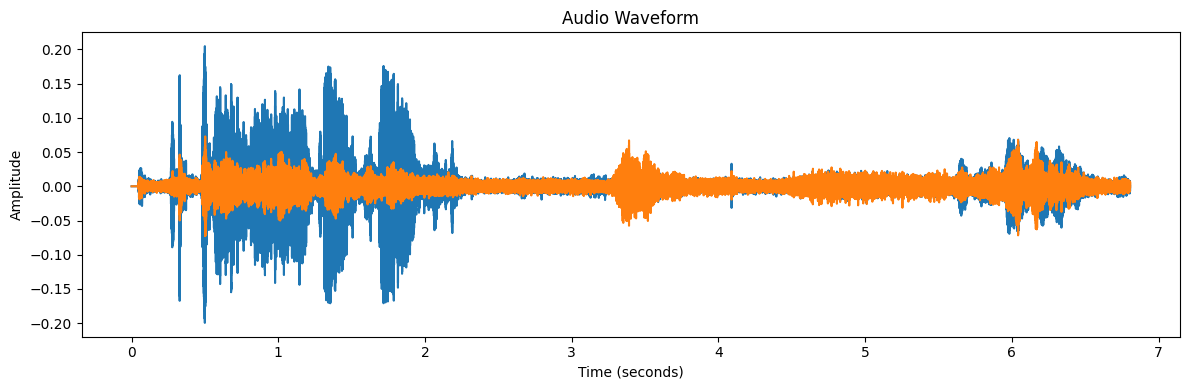

In [79]:
def get_audio(file_path):

    data, fs = sf.read(file_path)

    duration = len(data)/fs

    return fs, duration, data


# Example usage
path = "sounds/nature.mp3"  # Replace this with your actual file path
fs, duration, data = get_audio(path)

print(f"Sample rate (fs): {fs} Hz")
print(f"Duration: {duration:.2f} seconds")
print(f"Shape: {data.shape}")
print(f"Array type: {data.dtype}")
"""print(f"Mono Shape: {data_mono.shape}")
print(f"Array type: {data_mono.dtype}")"""

# Plot the audio waveform
plt.figure(figsize=(12, 4))
t = np.arange(0, len(data)) / fs
plt.plot(t, data)
plt.title('Audio Waveform')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [80]:
# Reproducir la señal de audio 
play_audio(data.T, rate=fs)

In [81]:
data_mono = np.mean(data, axis=1)
play_audio(data_mono.T, rate=fs)

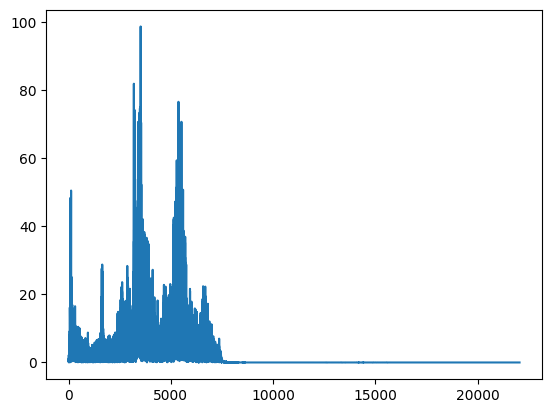

In [83]:
# Espectro

xt = data_mono.copy()

xw = np.fft.rfft(xt)
f = np.fft.rfftfreq(len(xt), 1/fs)

plt.plot(f,np.abs(xw))
plt.show()

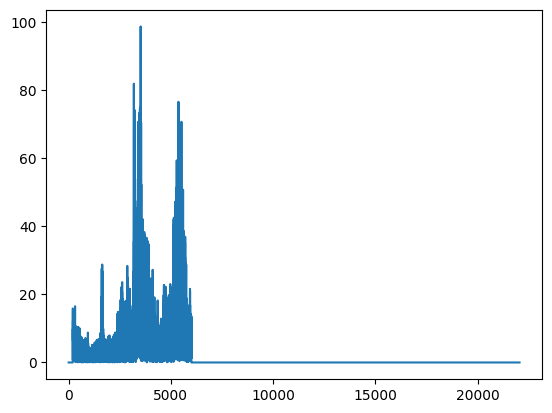

In [73]:
# Filtrar
xw_cut = xw.copy()

f1 = 200 #frecuencia en Hz corte 1
f2 = 6000 #frecuencia en Hz corte 2
ind = ~((f > f1) & (f < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
xw_cut[ind] = 0
plt.plot(f, np.abs(xw_cut))
plt.show()

In [ ]:
# Inversa

xt_cut = np.fft.irfft(xw_cut)
play_audio(xt_cut.T, rate=fs)

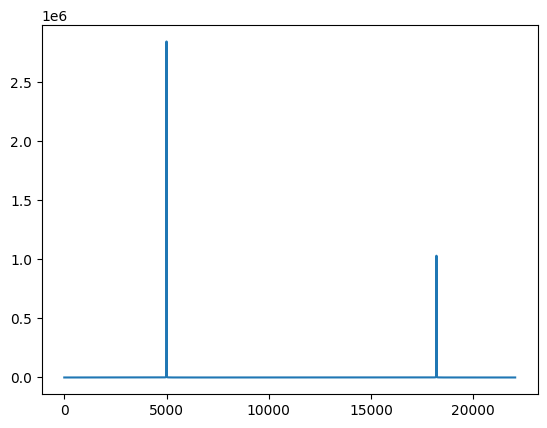

In [ ]:
Fo = 5000
F2 = 70000
Fs = 50000

A = 20
xt_cos = A*np.cos(2*np.pi*Fo*t) +0.5*A*np.cos(2*np.pi*F2*t)

xw_cos = np.fft.rfft(xt_cos)

plt.plot(f, np.abs(xw_cos))
plt.show()

play_audio(xt_cos.T, rate=fs)

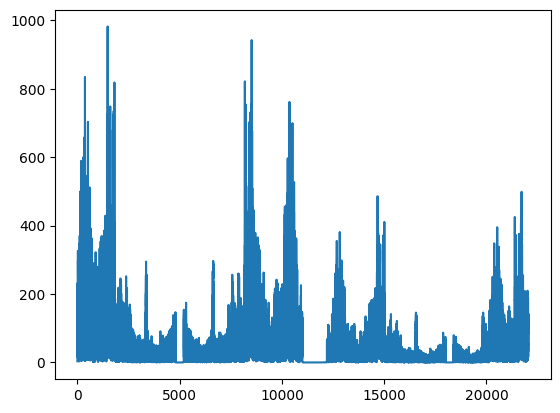

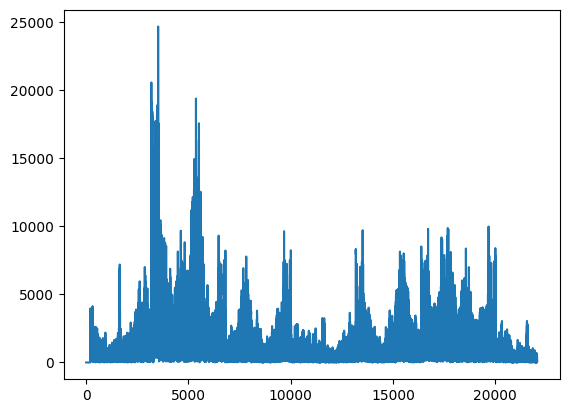

In [ ]:
# Usar xt_cut y xt_cos

xt_r = xt_cut * xt_cos[:len(xt_cos)-1]
xw_r = np.fft.rfft(xt_r)
plt.plot(f, np.abs(xw_r))
plt.show()

xt_r *= xt_cos[:len(xt_cos)-1]
xw_r = np.fft.rfft(xt_r)
plt.plot(f, np.abs(xw_r))
plt.show()

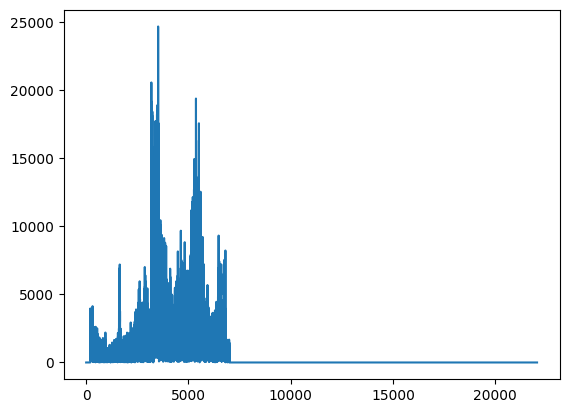

In [ ]:
xw_reconstruct = xw_r.copy()

f1 = 0 #frecuencia en Hz corte 1
f2 = 7000 #frecuencia en Hz corte 2
ind = ~((f > f1) & (f < f2)) #frecuencias eliminar-> recueder que ~ actua como negación
xw_reconstruct[ind] = 0

plt.plot(f, np.abs(xw_reconstruct))
plt.show()

xt_reconstruct = np.fft.irfft(xw_reconstruct)

play_audio(xt_reconstruct.T, rate=fs)